In [13]:
###Date Time 
###Exercise 1: Create a plot 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stocks = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)

In [7]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [8]:
stocks.head(3)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01


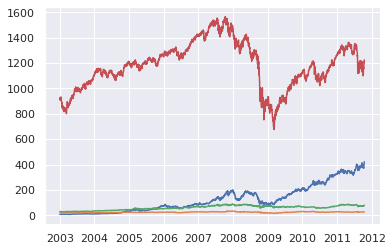

In [15]:
plt.plot(stocks)

In [23]:
##Exercise 2: Converting columns to Timestamps

df = pd.DataFrame({
    'date': ['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08'],
    'diet': ['apple', 'banana', 'cucumber', 'donut']
    })

ts = pd.to_datetime(df['date'])

df

,date,diet
0,2011-01-02,apple
1,2011-01-05,banana
2,2011-01-07,cucumber
3,2011-01-08,donut


In [24]:
ts

0   2011-01-02
1   2011-01-05
2   2011-01-07
3   2011-01-08
Name: date, dtype: datetime64[ns]

In [ ]:
###Exercise 3: Date Ranges 
###Note: BM = Business month end frequency (check frequency list)

In [25]:
pd.date_range('4/1/2012', '6/1/2012')
pd.date_range(start='4/1/2012', periods=20)
pd.date_range('1/1/2000', '12/1/2000', freq='BM')
pd.date_range('5/2/2012 12:56:31', periods=5)
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [35]:
## Exercise 4:Accessing DateTime indices

ts.dt.year
ts.dt.month
ts.dt.month_name()
ts.dt.day
ts.dt.day_name
ts.dt.minute

0    0
1    0
2    0
3    0
Name: date, dtype: int64

In [ ]:
## Exercise 5: Resampling

In [36]:

stocks_all = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)
stocks_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [37]:
stocks = stocks_all[['AAPL', 'MSFT', 'XOM']]
stocks.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [38]:
stocks.resample('W').first()

,AAPL,MSFT,XOM
2003-01-05,7.40,21.11,29.22
2003-01-12,7.45,21.52,29.96
2003-01-19,7.32,22.16,28.91
2003-01-26,7.01,20.17,27.94
2003-02-02,7.07,19.32,26.21
...,...,...,...
2011-09-18,379.94,25.89,71.84
2011-09-25,411.63,27.21,73.70
2011-10-02,403.17,25.44,71.72
2011-10-09,374.60,24.53,71.15


In [39]:
stocks.resample('2W').mean()

,AAPL,MSFT,XOM
2003-01-05,7.425000,21.125000,29.230000
2003-01-19,7.306000,21.729000,29.056000
2003-02-02,7.123333,19.561111,27.384444
2003-02-16,7.231000,18.561000,27.854000
2003-03-02,7.447778,19.036667,28.131111
...,...,...,...
2011-08-21,370.801000,24.844000,71.520000
2011-09-04,378.339000,25.410000,72.947000
2011-09-18,385.845556,26.223333,72.591111
2011-10-02,401.467000,25.733000,72.144000


In [40]:
stocks.resample('M').sum()

,AAPL,MSFT,XOM
2003-01-31,152.02,435.59,595.48
2003-02-28,139.34,356.94,531.72
2003-03-31,153.28,407.30,610.37
2003-04-30,145.40,417.30,610.06
2003-05-31,186.59,418.88,624.30
...,...,...,...
2011-06-30,7283.79,534.58,1746.05
2011-07-31,7444.76,535.98,1643.93
2011-08-31,8665.54,582.31,1680.35
2011-09-30,8242.36,545.35,1520.39


In [41]:
stocks.resample('6h').sum()

,AAPL,MSFT,XOM
2003-01-02 00:00:00,7.40,21.11,29.22
2003-01-02 06:00:00,0.00,0.00,0.00
2003-01-02 12:00:00,0.00,0.00,0.00
2003-01-02 18:00:00,0.00,0.00,0.00
2003-01-03 00:00:00,7.45,21.14,29.24
...,...,...,...
2011-10-13 00:00:00,408.43,27.18,76.37
2011-10-13 06:00:00,0.00,0.00,0.00
2011-10-13 12:00:00,0.00,0.00,0.00
2011-10-13 18:00:00,0.00,0.00,0.00


In [42]:
stocks.resample('6h').ffill()

,AAPL,MSFT,XOM
2003-01-02 00:00:00,7.40,21.11,29.22
2003-01-02 06:00:00,7.40,21.11,29.22
2003-01-02 12:00:00,7.40,21.11,29.22
2003-01-02 18:00:00,7.40,21.11,29.22
2003-01-03 00:00:00,7.45,21.14,29.24
...,...,...,...
2011-10-13 00:00:00,408.43,27.18,76.37
2011-10-13 06:00:00,408.43,27.18,76.37
2011-10-13 12:00:00,408.43,27.18,76.37
2011-10-13 18:00:00,408.43,27.18,76.37


In [44]:
## Exercise 6: Rolling Window 
stocks = stocks.asfreq('B').fillna(method='ffill')
stocks.head()


,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


<AxesSubplot:>

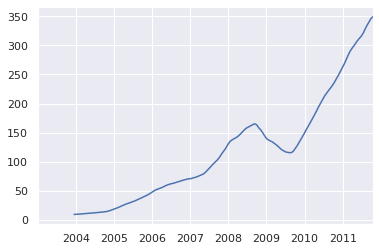

In [45]:
stocks['AAPL'].rolling(250).mean().plot()

<AxesSubplot:>

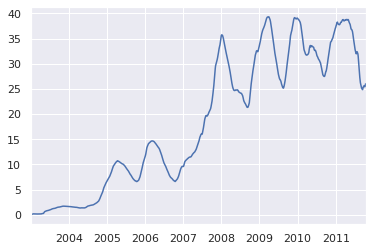

In [46]:
stocks['AAPL'].rolling(250, min_periods=10).std().plot()